In [70]:
import cv2
import matplotlib.pyplot as plt
from rich.console import Console
from rich.text import Text


In [71]:
console = Console()


In [72]:
def detect(ubahKeGray, gambar):
    # Memuat cascade classifier untuk deteksi wajah dan senyum
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
    
    # Deteksi wajah pada gambar grayscale
    faces = face_cascade.detectMultiScale(ubahKeGray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    wajah_terdeteksi = False
    senyum_terdeteksi = False
    
    for (x, y, w, h) in faces:
        wajah_terdeteksi = True
        # Gambar kotak di sekitar wajah
        cv2.rectangle(gambar, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(gambar, 'Wajah', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        
        # ROI (Region of Interest) untuk mendeteksi senyum
        roi_gray = ubahKeGray[y:y+h, x:x+w]
        roi_color = gambar[y:y+h, x:x+w]
        
        # Deteksi senyum pada ROI
        smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.8, minNeighbors=20, minSize=(25, 25))
        
        for (sx, sy, sw, sh) in smiles:
            senyum_terdeteksi = True
            # Gambar kotak di sekitar senyum
            cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)
            cv2.putText(roi_color, 'Senyum', (sx, sy-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
    
    # Cetak hasil deteksi dengan teks yang diformat
    if wajah_terdeteksi and senyum_terdeteksi:
        console.print(Text("Hasil deteksi wajah dan senyum", style="bold", justify="center", end=''))
    elif wajah_terdeteksi:
        console.print(Text("Hasil deteksi wajah saja", style="bold", justify="center", end=''))
    else:
        console.print(Text("Tidak ada wajah yang terdeteksi", style="bold", justify="center", end=''))
    
    return gambar


In [81]:
path_to_image = 'Gambar4.png'  # Ganti dengan path ke gambar yang ingin Anda gunakan
gambar_asli = cv2.imread(path_to_image)


In [82]:
if gambar_asli is None:
    print("Gambar tidak ditemukan di path yang diberikan.")
else:
    ubahKeGray = cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2GRAY)
    gambar_hasil = detect(ubahKeGray, gambar_asli.copy())


Hasil deteksi wajah dan senyum

In [83]:
    # Simpan gambar hasil deteksi
    path_to_save = 'hasil_deteksi.jpg'
    cv2.imwrite(path_to_save, gambar_hasil)
    print(f"Gambar hasil deteksi disimpan di {path_to_save}")


Gambar hasil deteksi disimpan di hasil_deteksi.jpg


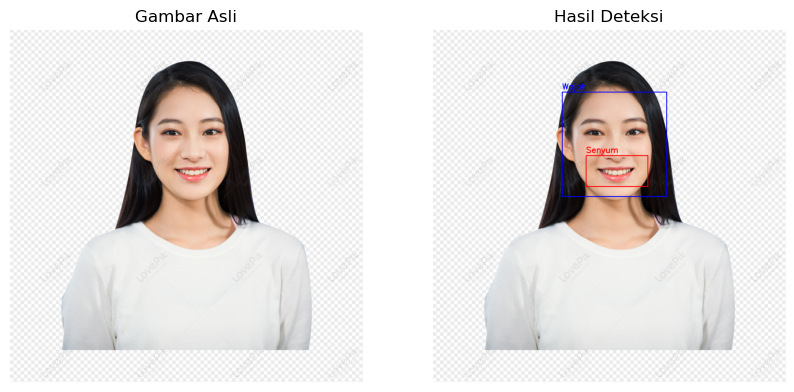

In [84]:
    # Tampilkan gambar asli
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Gambar Asli')

    # Tampilkan gambar hasil deteksi
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(gambar_hasil, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Hasil Deteksi')

    plt.show()
